# Recurrent Neural Network

Date: 2019-09-11  
Author: skettee  
Categories: Deep Learning, Recurrent Neural Network  
Tags: tanh, timesteps, many-to-one      
<!--eofm-->

시퀀스 모델링(Sequence Modeling)을 위한  리커런트 뉴럴 네트워크(Recurrent Neural Network) 에 대해 알아보고 keras를 이용해서 모델링을 해보자!
<!--more-->

실제로 돌려 보고 싶으면 구글 코랩으로 ~  

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/skettee/notebooks/blob/master/recurrent_neural_network.ipynb)

## 문제 (Problem)

💰 고객

> 친추한 여친이 이모티콘 문자를 보내면서 좋은 말인지 나쁜말인지 맞추어 보라고 하네요.   
> 지금까지 온 문자와 답은 아래와 같아요.  
>
> 🐱 🤖 ❤️ ❗️ : GOOD  
> 🐱 ❗️ 🐷 🐶 : BAD  
> 🐷 🐱 🤖 ❤️ : GOOD  
> ❤️ 🤖 ❗️ 🐷 : BAD  
> 🐶 🐱 ❤️ 🤖 : GOOD  
> 🐷 ❤️ ❗️ 🐶 : BAD  
> 🐱 🤖 🐷 ❤️ : GOOD  
> ❗️ ❤️ 🐱 🤖 : GOOD  
> 🤖 🐱 ❤️ 🐷 : BAD  
> 🐷 🐶 ❗️ ❤️ : BAD  
>
> 아래 이모티콘 문자가 좋은 말인지 나쁜말인지 알려주는 인공지능을 만들어 주세요~  
>
> 문자 1: 🐶 🐱 🤖 ❤️   
> 문자 2: 🤖 ❗️ 🐷 🐶   

⚙️ 엔지니어

> 혹시~ 여친님이 암호 전문가?   


## 데이터 수집 (Data Collection)

넘파이(Numpy) 배열(array)로 데이터를 만들자  

In [1]:
import numpy as np

x = np.array([['🐱', '🤖', '❤️', '❗️'], 
              ['🐱', '❗️', '🐷', '🐶'], 
              ['🐷', '🐱', '🤖', '❤️'], 
              ['❤️', '🤖', '❗️', '🐷'], 
              ['🐶', '🐱', '❤️', '🤖'], 
              ['🐷', '❤️', '❗️', '🐶'], 
              ['🐱', '🤖', '🐷', '❤️'], 
              ['❗️', '❤️', '🐱', '🤖'], 
              ['🤖', '🐱', '❤️', '🐷'], 
              ['🐷', '🐶', '❗️', '❤️']] )

y = np.array([['GOOD'], ['BAD'], ['GOOD'], ['BAD'], ['GOOD'], 
              ['BAD'], ['GOOD'],  ['GOOD'], ['BAD'], ['BAD']])

print(x.shape)
print(y.shape)

(10, 4)
(10, 1)


## 데이터 분석 (Data Analysis)

데이터 분석의 경험과 나에게 존재하는 풍부한 ~~갬성~~ 감성을 바탕으로 이모티콘의 의미를 단번에 간파하고 테이블로 만들었다.  

이모티콘 | 의미
---------|-----
🐱 | 나 
🤖 | 너
❗️ | 졸라
❤️ | 좋다
🐷 | 바보
🐶 | 멍청이

위의 변환 테이블을 바탕으로 문자 이모티콘을 해석한 테이블을 만들었다.  

문자 이모티콘  | 의미                           | 감성 분석
------------- |----------------------|-----------
🐱 🤖 ❤️ ❗️ | 나 너 좋아해 졸라        | GOOD  
🐱 ❗️ 🐷 🐶 | 난 졸라 바보 멍청이야 | BAD  
🐷 🐱 🤖 ❤️ | 바보야 난 너 좋아해    | GOOD  
❤️ 🤖 ❗️ 🐷 | 좋냐 넌 졸라 바보야    | BAD
🐶 🐱 ❤️ 🤖 | 멍청이 나 좋아해 너를 | GOOD
🐷 ❤️ ❗️ 🐶 | 바보 좋냐 졸라 멍청아 | BAD
🐱 🤖 🐷 ❤️ | 난 너가 바보같이 좋다 | GOOD
❗️ ❤️ 🐱 🤖 | 졸라 좋다 나는 너를     | GOOD
🤖 🐱 ❤️ 🐷 | 너 나 좋냐 바보야        | BAD
🐷 🐶 ❗️ ❤️ | 바보 멍청아 졸라 좋냐  | BAD

고객이 의뢰한 문자에 대해서 의미와 감성 분석 예상 테이블이다.  

문자 이모티콘  | 의미                           | 예상
------------- |---------------------|-----------
🐶 🐱 🤖 ❤️ | 멍청이 나 너 좋아해    | GOOD  
🤖 ❗️ 🐷 🐶 | 넌 졸라 바보 멍청이야 | BAD  


이 문제는 뉴럴 네트워크(NN)로는 해결할 수 없다.  
왜냐하면... 아래 데이터를 보자   

문자 이모티콘  | 의미                           | 예상
------------- |---------------------|-----------
🐱 🤖 🐷 ❤️ | 난 너가 바보같이 좋다 | GOOD  
🤖 🐱 ❤️ 🐷 | 너 나 좋냐 바보야        | BAD  

문자 이모티콘의 순서만 바뀌어도 예상 결과값이 다르게 된다!    

⚙️ 엔지니어

> 데이터의 순서가 결과에 영향을 미친다!     
> 새로운 모델이 필요하다.  
> 
> 걱정마라      
> 데이터의 순서를 고려한 모델이 존재한다.  
> 그것은 바로...  


## 리커런트 뉴럴 네트워크 모델링 (RNN Modeling)

지금까지 알아 보았던 NN, CNN, MF등은 데이터의 순서와는 상관이 없었다.  
그러나 이번 문제는 데이터의 순서를 고려해야 한다. 즉, 이전 데이터의 정보도 모델링에 필요하다.  

⚙️ 엔지니어  

> 엔지니어들을 갈아서 만든     
> RNN 모델은 다음과 같다.    

![RNN 모델](https://skettee.github.io/post/recurrent_neural_network/rnn_model.png)


$a^{<t>} = g\left(W_{aa}a^{<t-1>} + W_{ax}x^{<t>} + b_a\right)$  

$\hat y^{<t>} = W_{ya}a^{<t>} + b_y$  


⚙️ 엔지니어  

> 이전 데이터의 활성함수(activation function) 값을  
> 현재 데이터의 입력값으로 사용한다.  
> 똑똑해~  
>
> RNN에서의 활성함수 $g(z)$는 ReLU 혹은 **tanh** 를 사용한다.  
> tanh란?  

### 하이퍼볼릭 탄젠트 함수 (tanh function)

tanh 함수는 sigmoid 함수의 중심값을 0으로 옮겨 놓은 함수이다.  sigmoid 보다 좀 더 개선된 성능을 보인다고 한다.  

$tanh(x) = \dfrac{e^x - e^{-x}}{e^x + e^{-x}}$

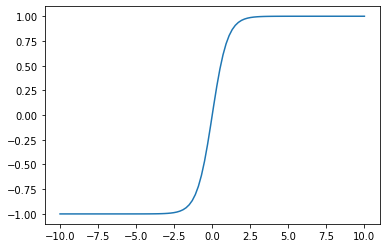

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

tanh = lambda x: (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

xx = np.linspace(-10,10,100)

plt.plot(xx, tanh(xx))
plt.show()

### Many-to-One Model

RNN모델은 5가지로 나눌 수 있다.  

![RNN 모델 종류](http://karpathy.github.io/assets/rnn/diags.jpeg)

출처: [Andrej Karpathy blog](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)

자세한 설명은 생략한다.  우리 문제를 해결하기 위해서 감성분석(Sentiment Anaysis)에 주로 사용되는 many to one 모델을 사용하자  
입력과 출력의 모양은 아래 그림과 같다.  

![many-to-one](https://skettee.github.io/post/recurrent_neural_network/many_to_one.png)


### 정리

1. Input Layer  (핑크색)
    1. Batch size는 10개   
    2. Time step은 4개 ($T_x = 4$)   
    3. Feature 개수는 입력에 들어가는 이모티콘 1개  
2. RNN Layer  (연두색)
    1. 32개 유닛으로 구성한다.  
    2. 활성 함수는 ReLU를 사용한다.  
3. Output Layer (파랑색)
    1. 활성 함수는 시그모이드(Sigmoid)를 사용한다.
4. Loss funtion 은 mean squared error 를 사용한다.  
5. Optimizer 는 RMSProp을 사용한다.  


## 케라스(Keras)로 모델링(Modeling)

### 데이터 변환 (Data Transformation)

입력 데이터의 이모티콘과 출력 데이터의 문자를 숫자로 변환한다.  

In [3]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Encoding X
batch_size = x.shape[0]
input_dim = x.shape[1]
x_train = x.flatten() # Flattern
x_train = encoder.fit_transform(x_train) # Labeling
x_train = np.reshape(x_train, (batch_size, input_dim)) # Reshape

# Encoding Y
batch_size = y.shape[0]
input_dim = y.shape[1]
y_train = y.flatten() # Flattern
y_train = encoder.fit_transform(y_train) # Labeling
y_train = np.reshape(y_train, (batch_size, input_dim)) # Reshape

print(x_train.shape)
print(y_train.shape)

(10, 4)
(10, 1)


Keras의 RNN에 입력되는 데이터의 모양(shape) 은 다음과 같다.   

**(batch_size, timesteps, features)**  

따라서 입력 데이터의 shape를 (10, 4, 1)로 변환한다.  

In [4]:
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
Y_train = y_train
print(X_train.shape)
print(Y_train.shape)

(10, 4, 1)
(10, 1)


### 모델링 (Modeling)

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(4, 1), activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

W0913 23:04:53.602141 139855953307456 deprecation.py:506] From /home/dataman/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                1088      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


### 모델 훈련 (Train Model)

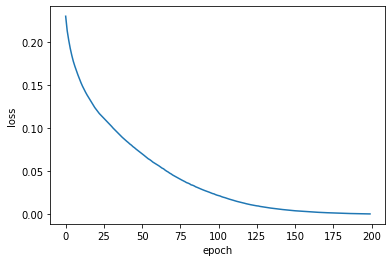

In [6]:
hist = model.fit(X_train,Y_train, epochs=200, verbose=0)

plt.plot(hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 해결 (Solution)

⚙️ 엔지니어  

> 고객님~ 원하시는 솔루션입니다.    
>
> test_data에 원하시는 문자 이모티콘을 입력하시면    
> 감성 분석 결과 값 (GOOD, BAD)가 출력 됩니다.   


In [7]:
def analyze_message(message):
    x = np.array([message])
    if x.shape[0] != 1:
        return None
    if x.shape[1] != 4:
        return None
    batch_size = x.shape[0]
    time_steps = x.shape[1]
    x = x.flatten()
    x = encoder.fit_transform(x)
    X_test = np.reshape(x, (batch_size, time_steps, 1))
    predict = model.predict(X_test)
    if predict[0] > 0.5:
        return 'GOOD'
    else:
        return 'BAD'

test_data1 = ['🐶', '🐱', '🤖', '❤️']
result = analyze_message(test_data1)
print('{} : {}'.format(test_data1, result))

test_data2 = ['🤖', '❗️', '🐷', '🐶']
result = analyze_message(test_data2)
print('{} : {}'.format(test_data2, result))

['🐶', '🐱', '🤖', '❤️'] : GOOD
['🤖', '❗️', '🐷', '🐶'] : BAD
